# Libraries Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

# Dataset

In [15]:
#Read data file
file_path = '/content/drive/MyDrive/Colab Notebooks/ImportExport_237_AU1940_1.2.csv'
df = pd.read_csv(file_path)

In [3]:
#overview of data
'''

Import/Export between India and China from 2012-13 to 2015-16
Source : https://data.gov.in/resource/export-import-goods-china-during-2012-2015-ministry-commerce-industry
All figures are in US $ millions.

'''
df.head()

,E_BROC_DESC,2012-13 - EXPORT,2012-13 - IMPORT,2013-14 - EXPORT,2013-14 - IMPORT,2014-15 - EXPORT,2014-15 - IMPORT,2015-16(Apr-Sep) - EXPORT,2015-16(Apr-Sep) - IMPORT
0,"AC, REFRIGERATION MACHNRY ETC",30.49,1021.27,25.64,986.14,34.57,1099.55,13.65,496.44
1,ACCUMULATORS AND BATTERIES,1.63,343.07,2.89,441.98,2.06,321.39,0.09,223.18
2,AGRO CHEMICALS,52.49,243.53,53.03,317.73,47.44,412.22,22.89,236.89
3,"AIRCRAFT, SPACECRAFT AND PARTS",9.62,1.27,411.19,16.51,157.75,23.59,6.43,3.10
4,ALCOHOLIC BEVERAGES,0.52,1.27,0.43,1.14,0.52,0.14,0.30,0.13


## Top 10 Imports as per transaction

In [4]:
# columns heading of data
cols = df.columns

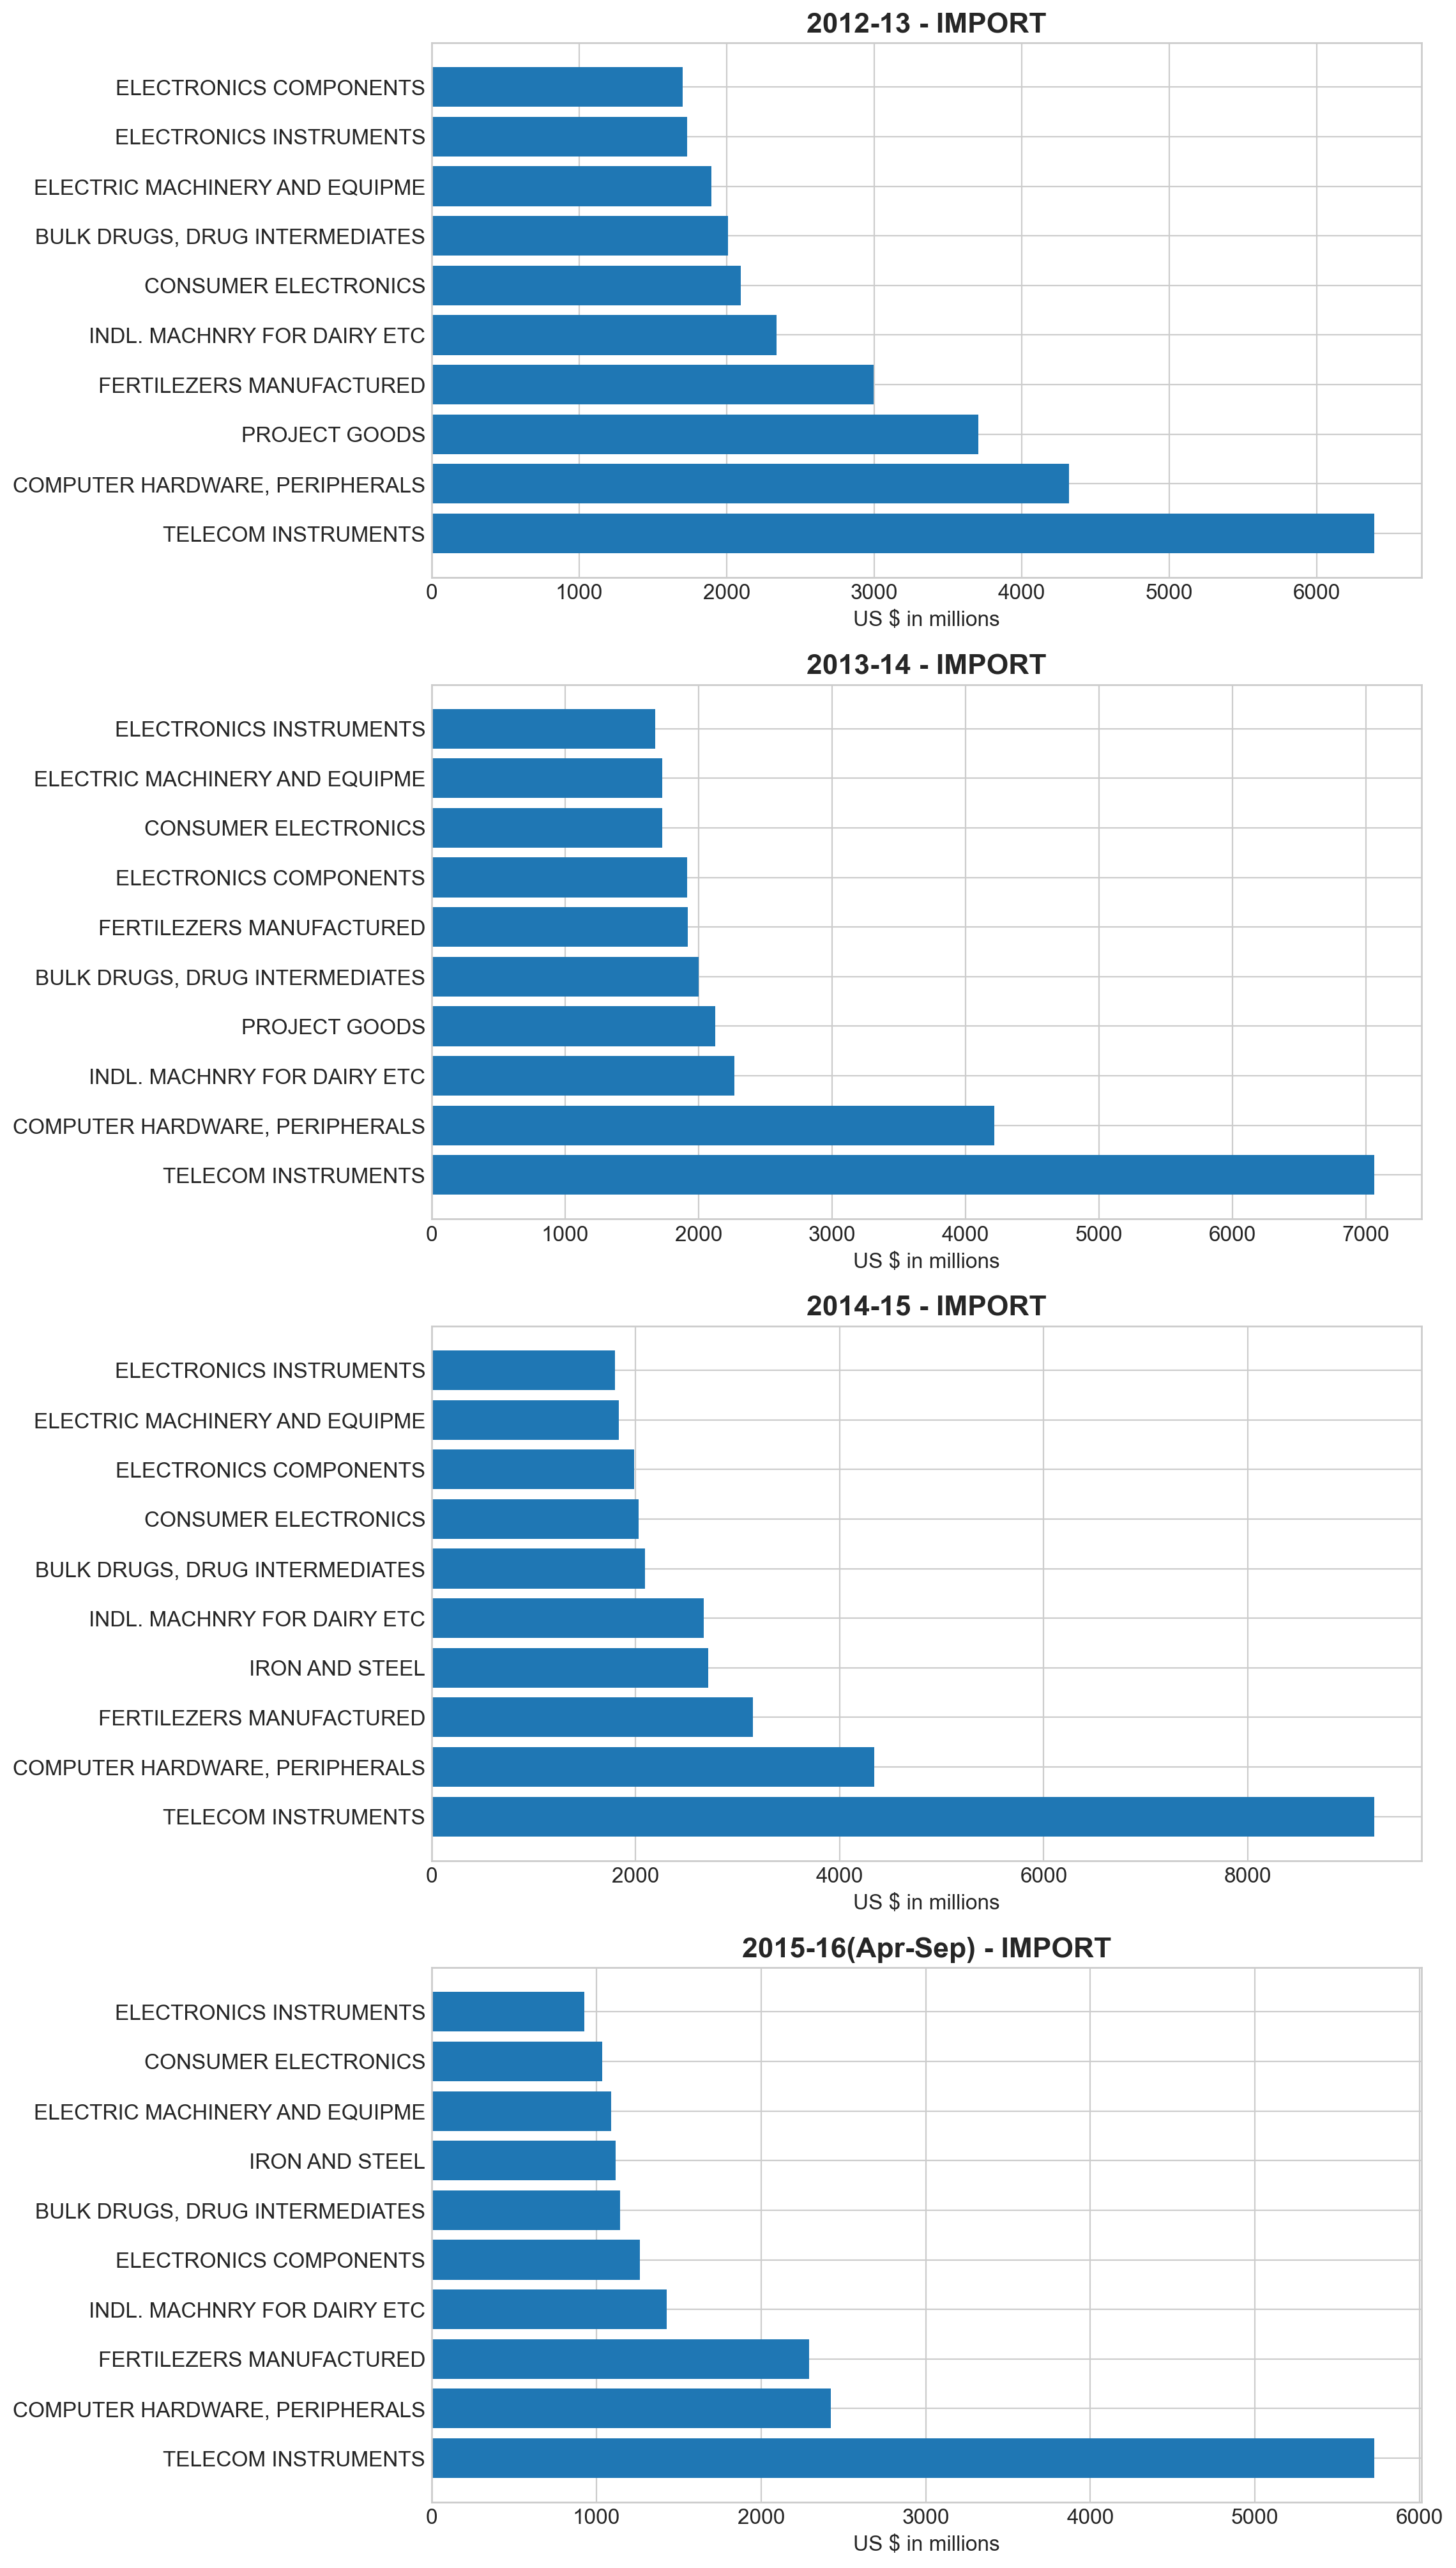

In [5]:
fig = plt.figure(1,figsize=(10,25))
plt.style.use("seaborn-whitegrid")

for i in range(1,5):
    df_topImports = df.sort_values(by=cols[2*i], ascending=False)[:10]
    plt.subplot(4,1,i)
    plt.title(cols[2*i], size = 16,fontweight="bold")
    plt.xlabel('US $ in millions', size=12)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.barh(df_topImports[cols[0]], df_topImports[cols[2*i]])

plt.savefig('hbar_import.png')

<font size = 4, color=green><i><b> It is clear from above bar plots, India heavily imported Telecom and Electronics instruments and components in past subsequent years. We all know how dependent we are on china on electronic devices.</font>

## Top 10 Exports as per transaction

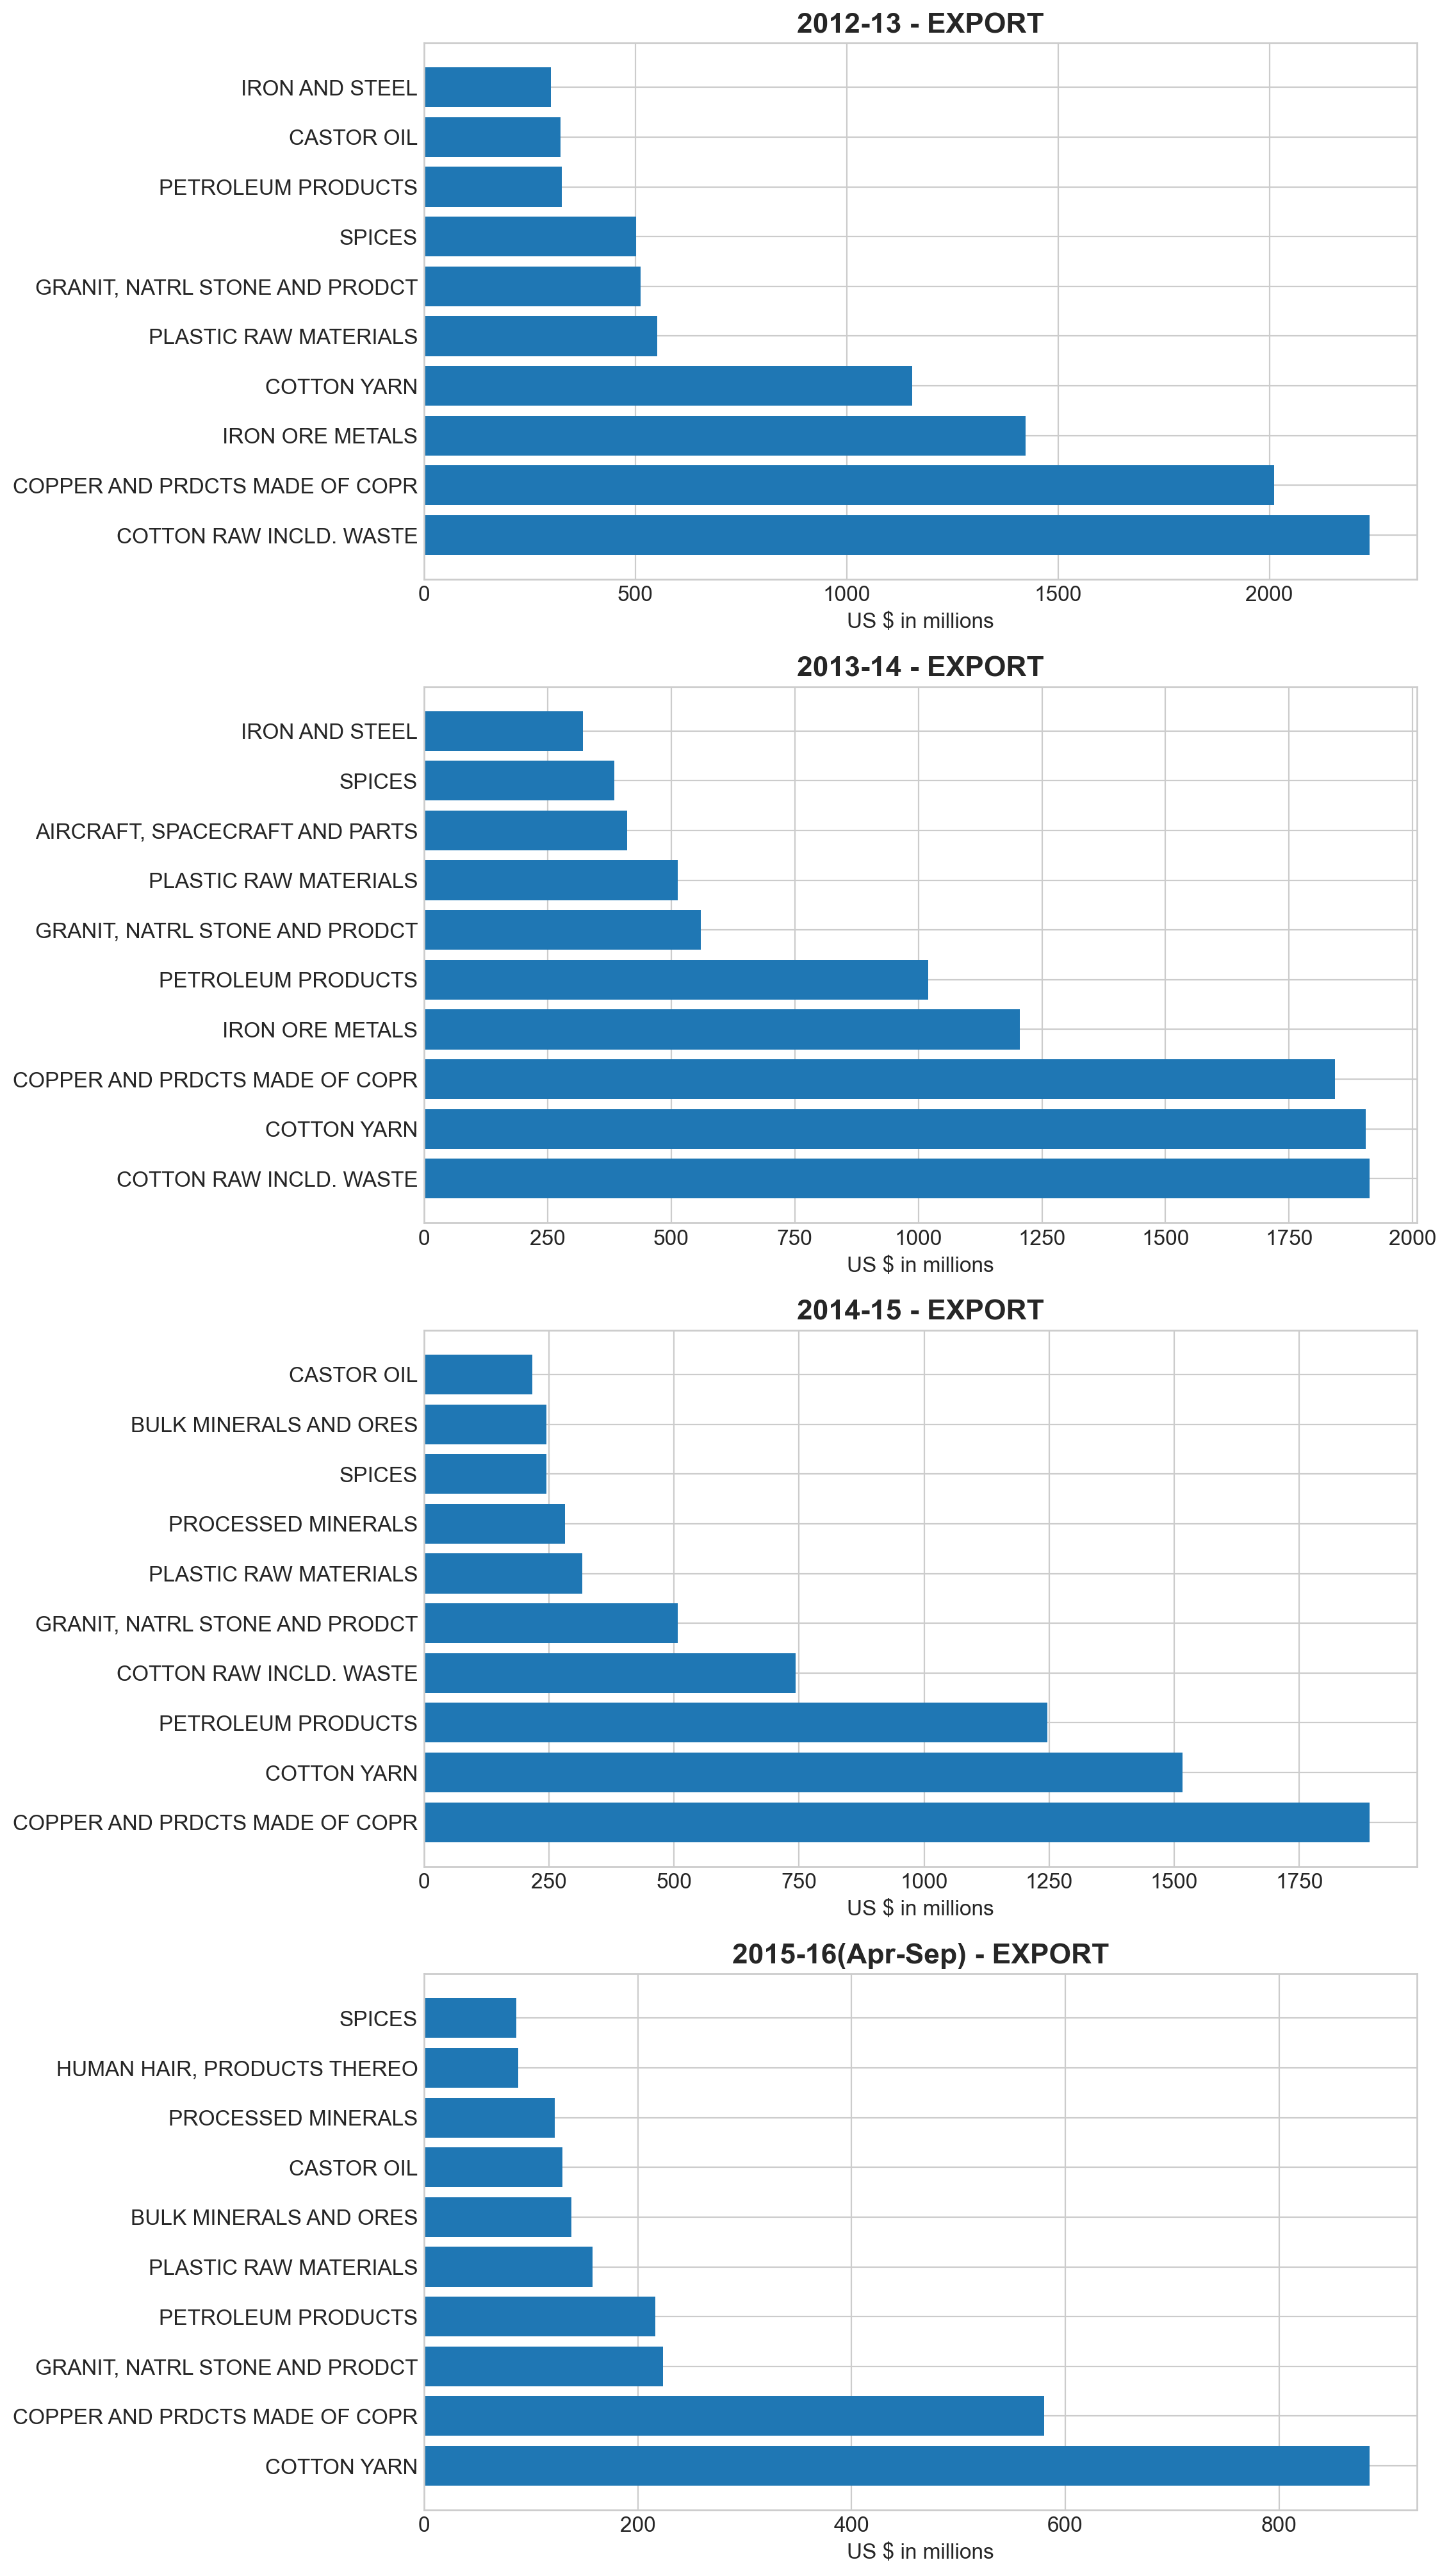

In [6]:
fig = plt.figure(1,figsize=(10,25))
plt.style.use("seaborn-whitegrid")

for i in range(1,5):
    df_topExports = df.sort_values(by=cols[2*i-1], ascending=False)[:10]
    plt.subplot(4,1,i)
    plt.title(cols[2*i-1], size = 16,fontweight="bold")
    plt.xlabel('US $ in millions', size=12)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.barh(df_topExports[cols[0]],df_topExports[cols[2*i-1]])

plt.savefig("hbar_Exports.png")

<font size = 4, color=green><i><b>We exported raw iron, cotton and cotton products, copper products, minerals,spices and oil, petroleum products on large scale.</font>

## Import/Export shares
<font size='4'><blockquote>We looked import/export data qualitatively, lets do some quantitative analysis. I used pi chart to get some quantitative idea about share of major import/export sectors</blockquote>

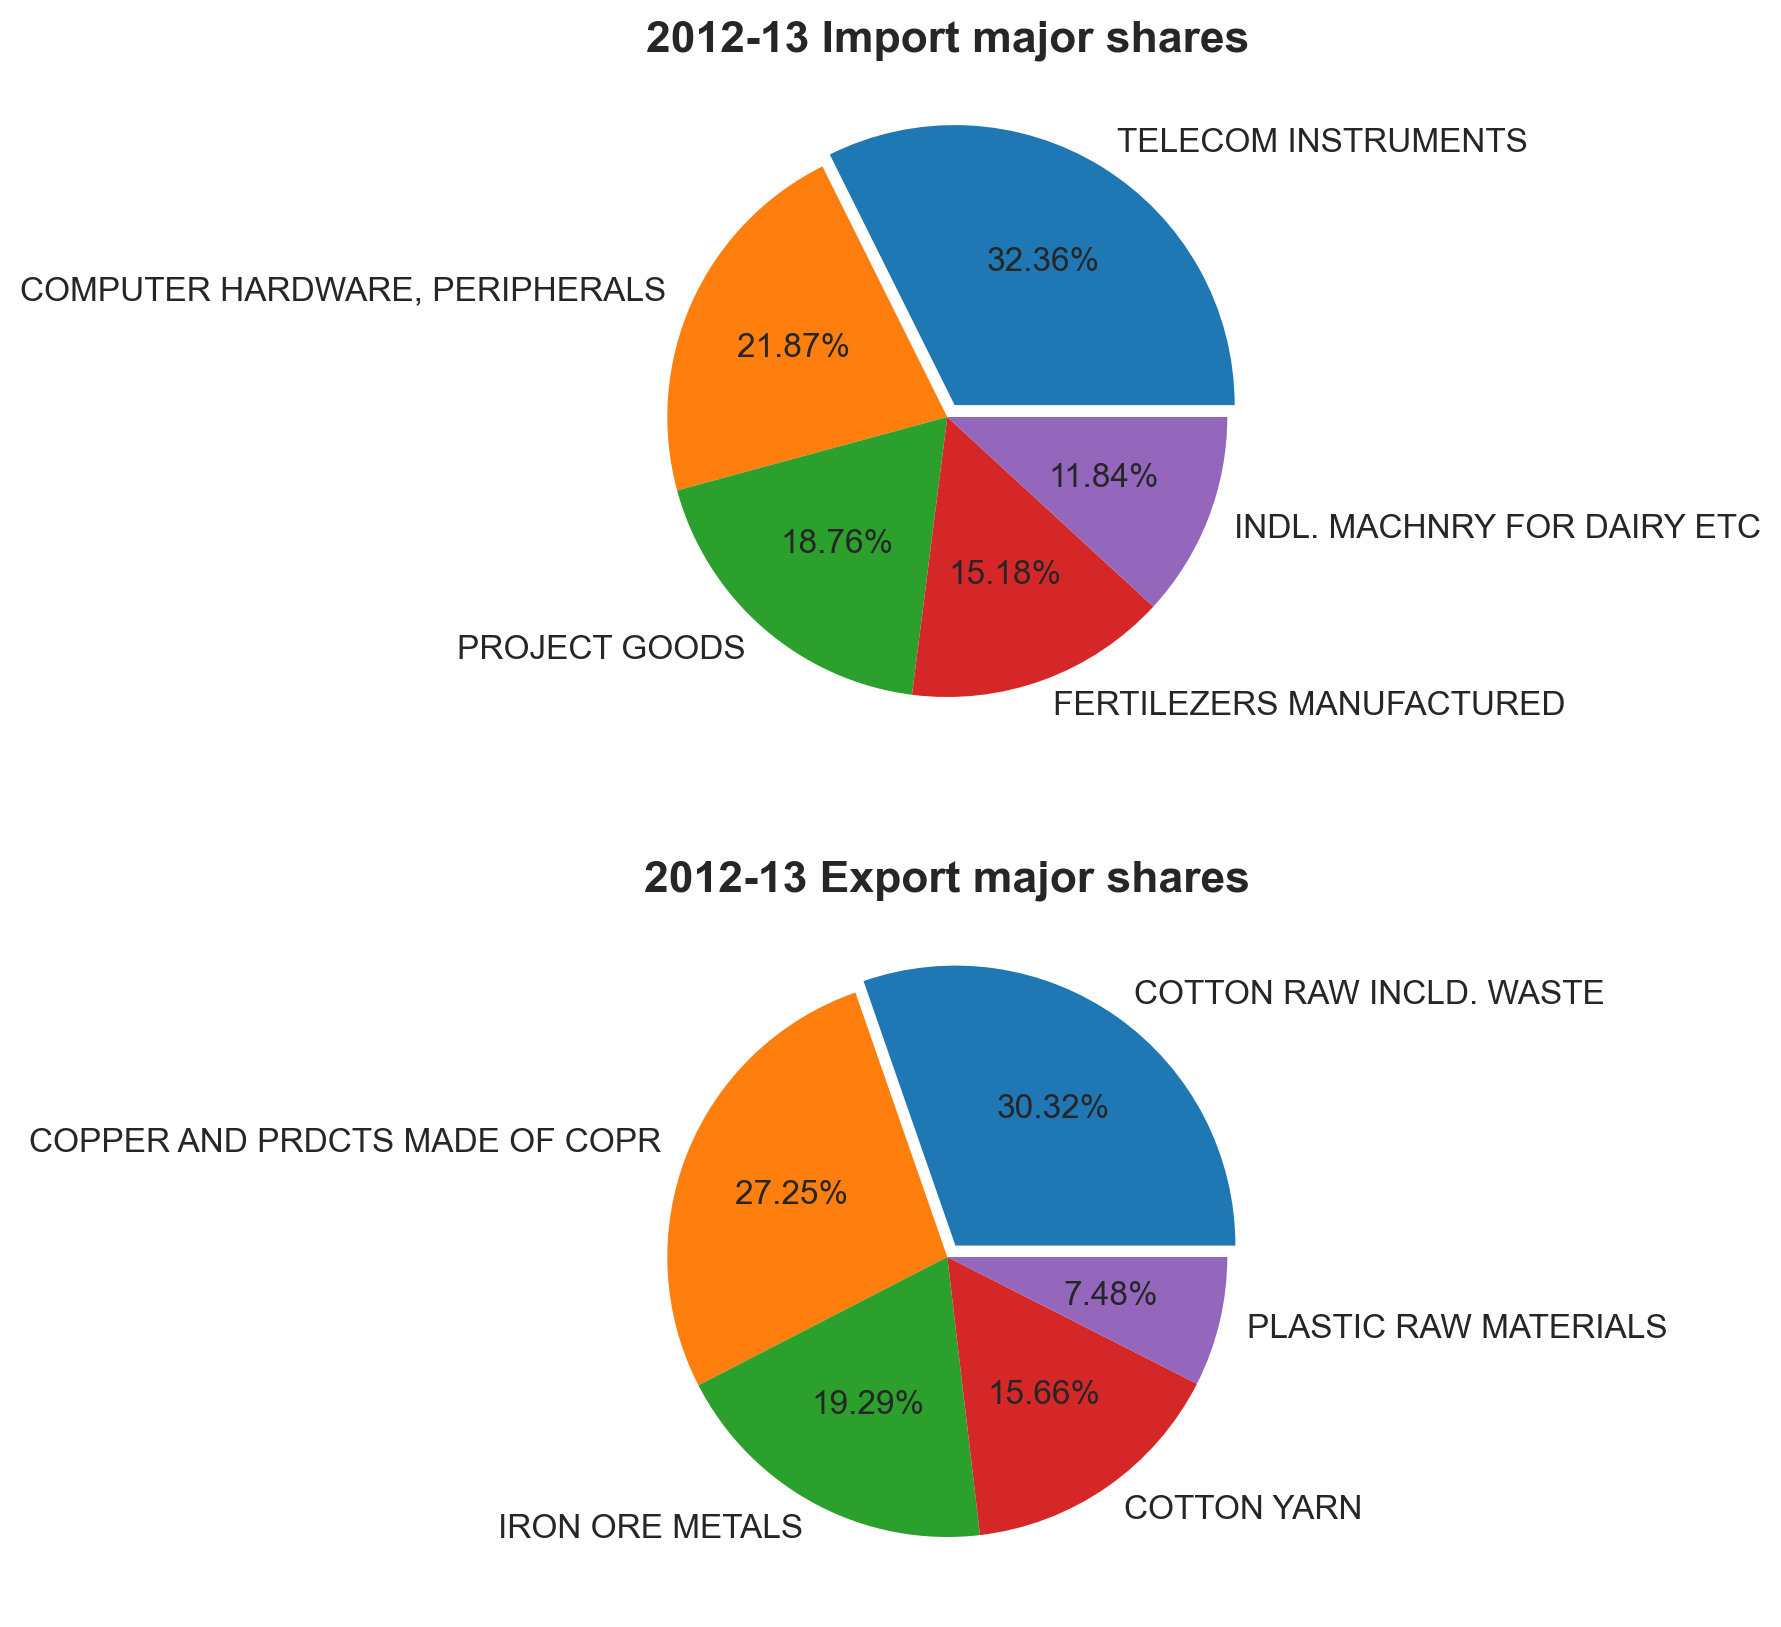

In [7]:
fig = plt.figure(2,figsize=(10,10))
df_topImports = df.sort_values(by=cols[2], ascending=False)[:5]
plt.subplot(2,1,1)
plt.title('2012-13 Import major shares', size = 16, fontweight="bold")
outstand = [0.05,0,0,0,0]
plt.pie(df_topImports[cols[2]], labels = df_topImports[cols[0]],autopct='%1.2f%%',textprops={'fontsize': 12}, explode = outstand)

df_topExports = df.sort_values(by=cols[1], ascending=False)[:5]
plt.subplot(2,1,2)
plt.title('2012-13 Export major shares', size = 16, fontweight="bold")
plt.pie(df_topExports[cols[1]], labels = df_topExports[cols[0]],autopct='%1.2f%%',textprops={'fontsize': 12}, explode = outstand)

plt.savefig('pichart_Imports_Exports.png')

plt.show()

<font size = 4, color=green><i><b>Above pi chart gives some quantitative idea of major imports and exports. We see telecom instrument and computer hardware together contains more than 50% of imports.</font>

## Import/Export volume
<font size='4'><blockquote>We will look at how volume of total import/export changed with subsequent years.</blockquote>

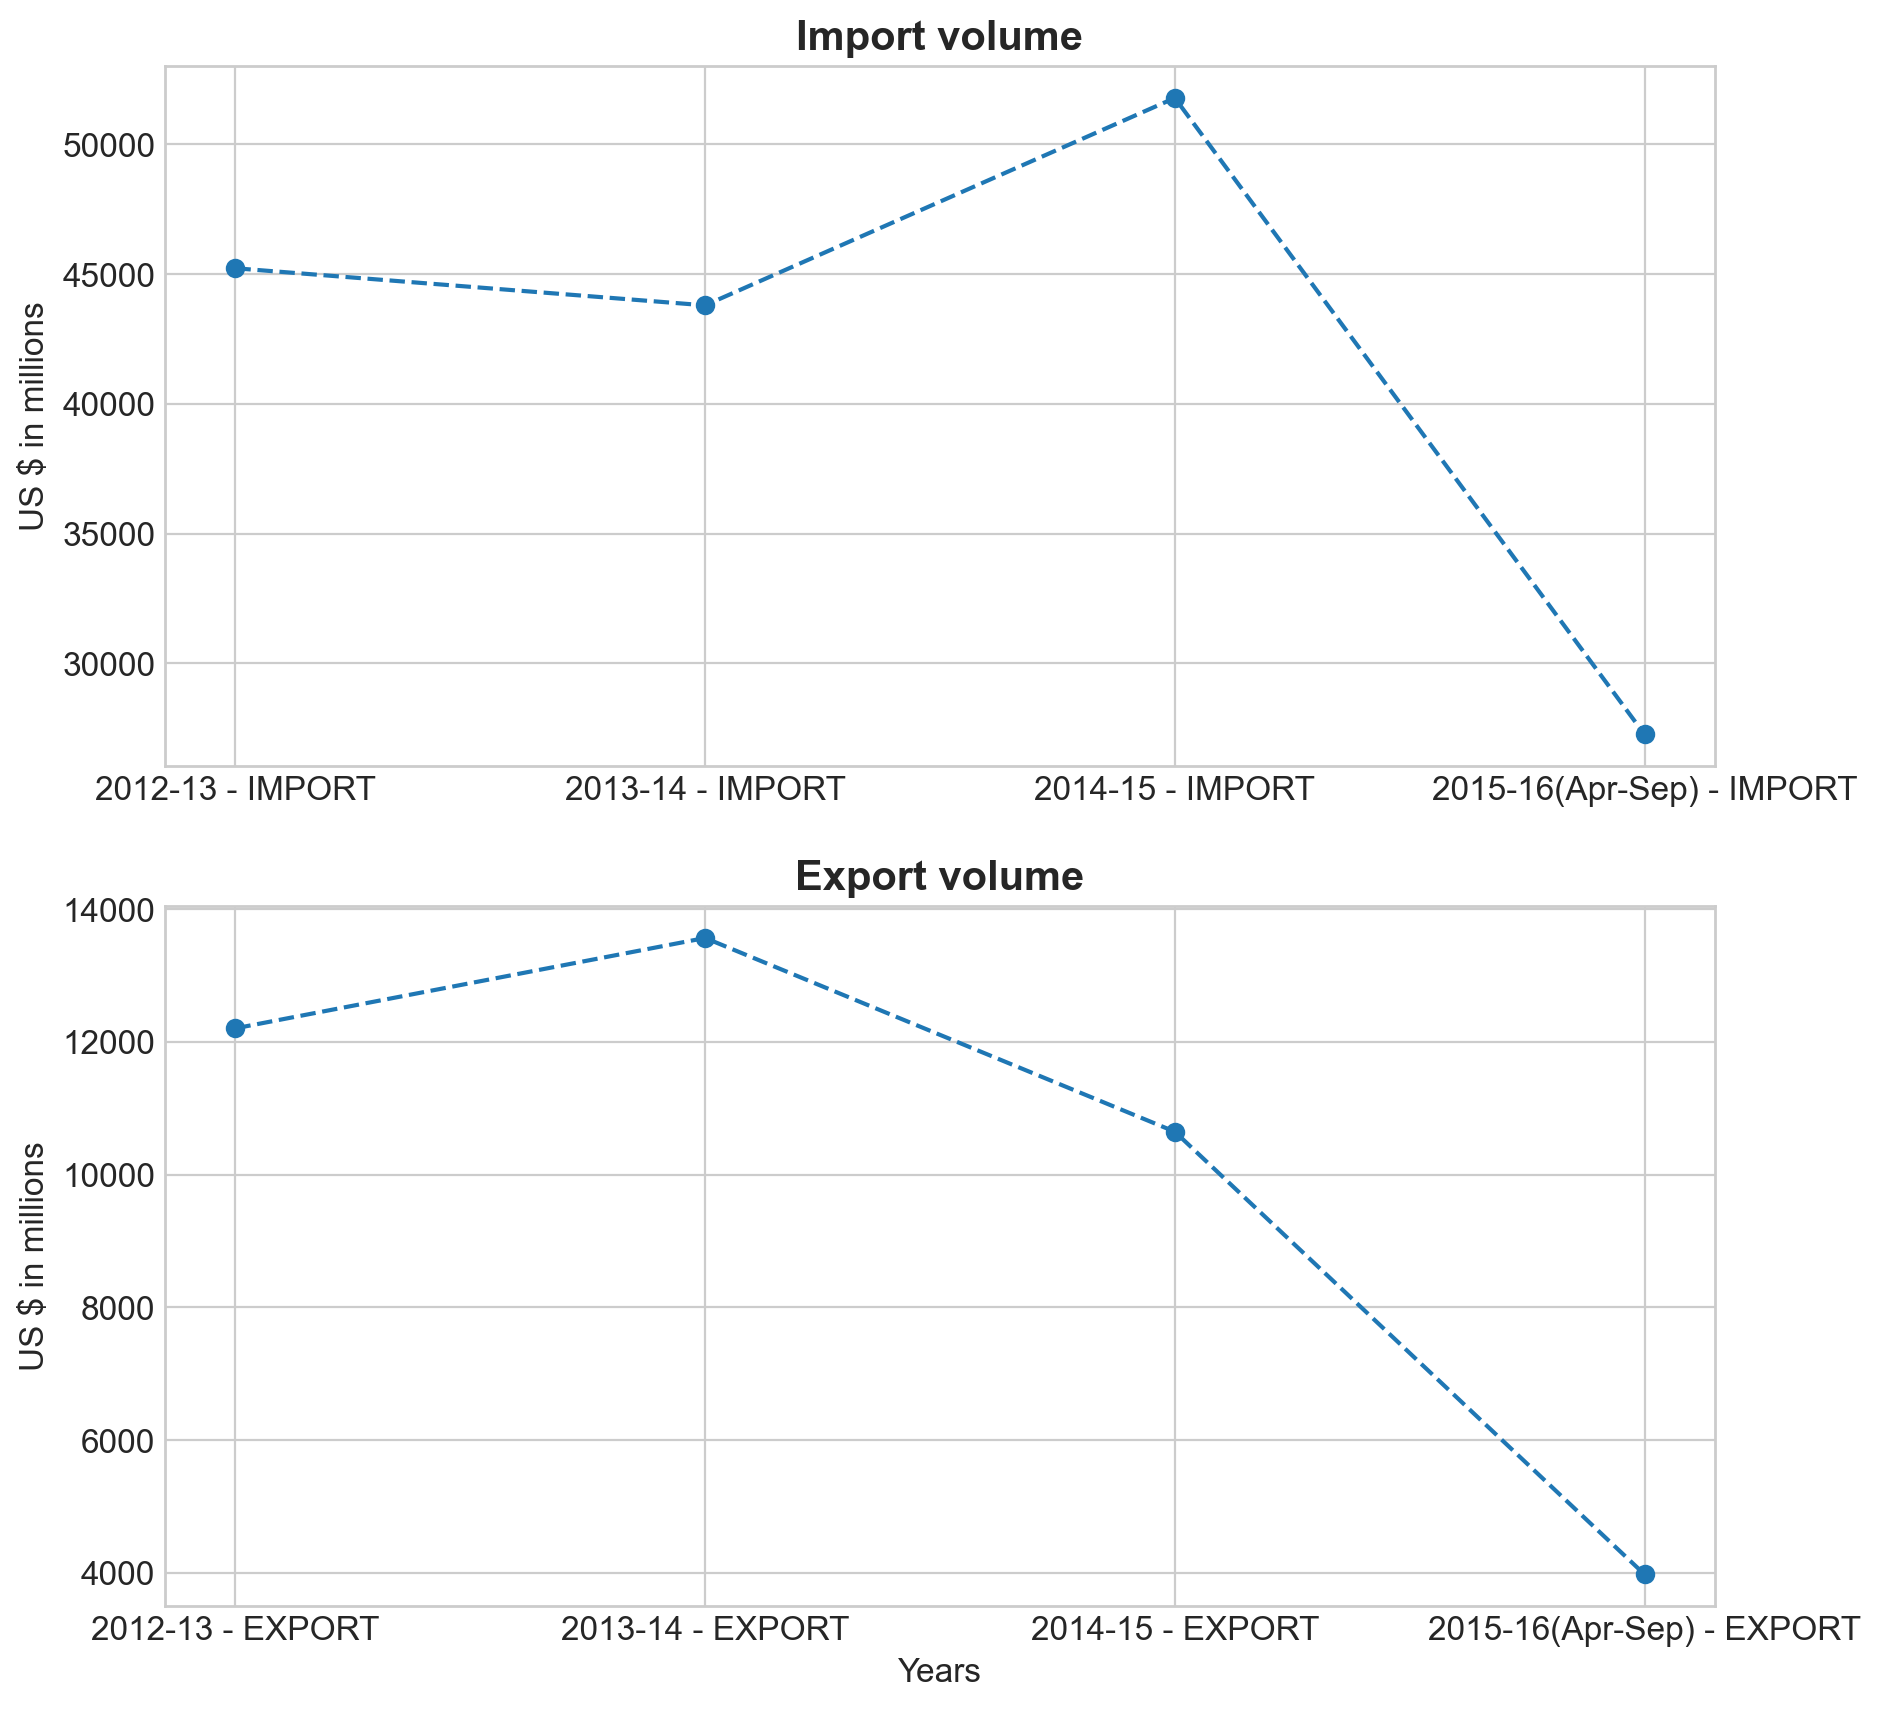

In [9]:
x1 = cols[2:9:2]
y1 = [sum(df[cols[i]].dropna()) for i in range(2,9,2)]
x2 = cols[1:8:2]
y2 = [sum(df[cols[i]].dropna()) for i in range(1,8,2)]

fig = plt.figure(2,figsize=(10,10))
plt.style.use("seaborn-whitegrid")
plt.subplot(2,1,1)
plt.ylabel('US $ in millions', size=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Import volume', size = 15, fontweight="bold")

plt.plot(x1,y1,'--o')

plt.subplot(2,1,2)
plt.ylabel('US $ in millions', size=12)
plt.xlabel('Years', size=12)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Export volume', size = 15, fontweight="bold")

plt.plot(x2,y2,'--o')

plt.savefig('line_Imports_Exports_volume.png')
plt.show()

<font size = 4, color=green><i><b>We see a steep fall in import/export volume in 2015-16.
    "Low commodity prices and a global slowdown, driven by faltering Chinese economy, is all set to take exports to their lowest in five years in 2015-16." - Hindustan Times.</font>

## Major Import/Export comparison

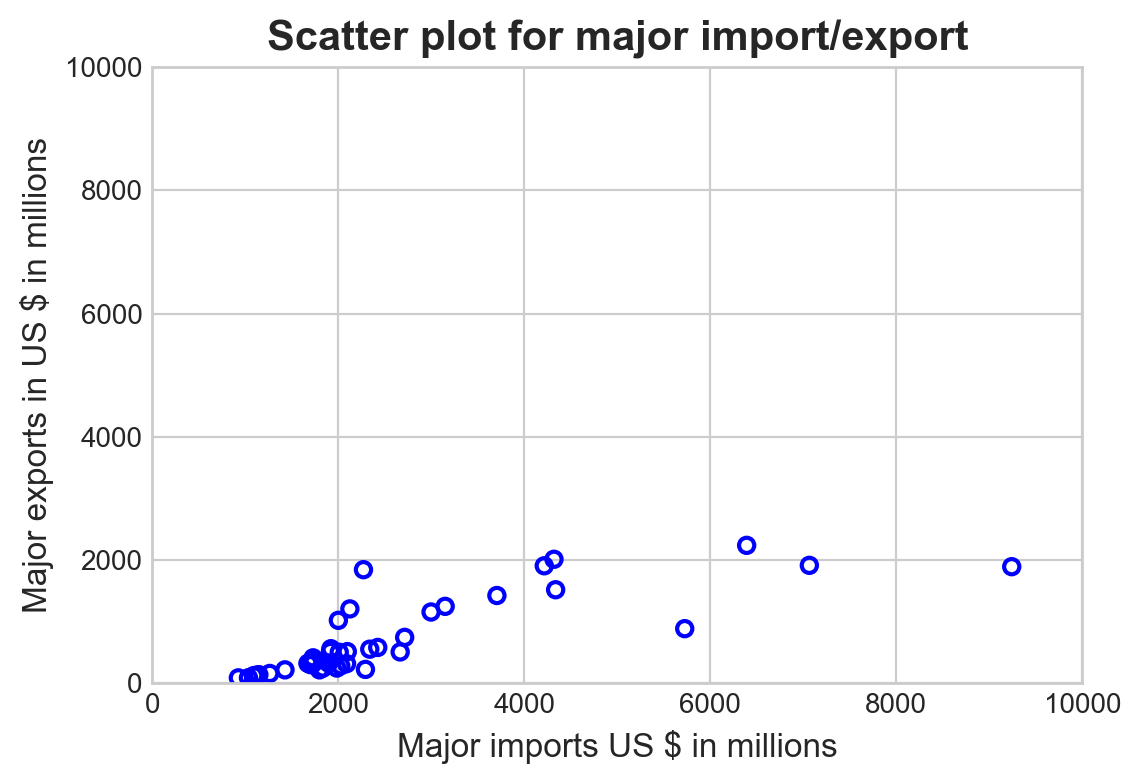

In [10]:
imports = []
exports = []

for i in [2,4,6,8]:
    df_topImports = df.sort_values(by=cols[i], ascending=False)[:10]
    imports.append(df_topImports[cols[i]])

    df_topExports = df.sort_values(by=cols[i-1], ascending=False)[:10]
    exports.append(df_topExports[cols[i-1]])

fig, ax = plt.subplots(figsize=(6,4))
plt.style.use("seaborn-whitegrid")
plt.title('Scatter plot for major import/export', size = 15, fontweight="bold")
plt.xlabel('Major imports US $ in millions', size=12)
plt.ylabel('Major exports in US $ in millions', size=12)
ax.set_xlim(0,10000)
ax.set_ylim(0,10000)
ax.scatter(imports,exports, s=30,facecolors='none', edgecolor='blue', linewidth=1.5)

plt.savefig('scatter_Imports_Exports.png')

plt.show()



<font size = 4, color=green><i><b>This scatter plot shows trade is highly inclined towards import, which is not good indication for India.</font>

## 4.2 Total Import-Export volume comparison

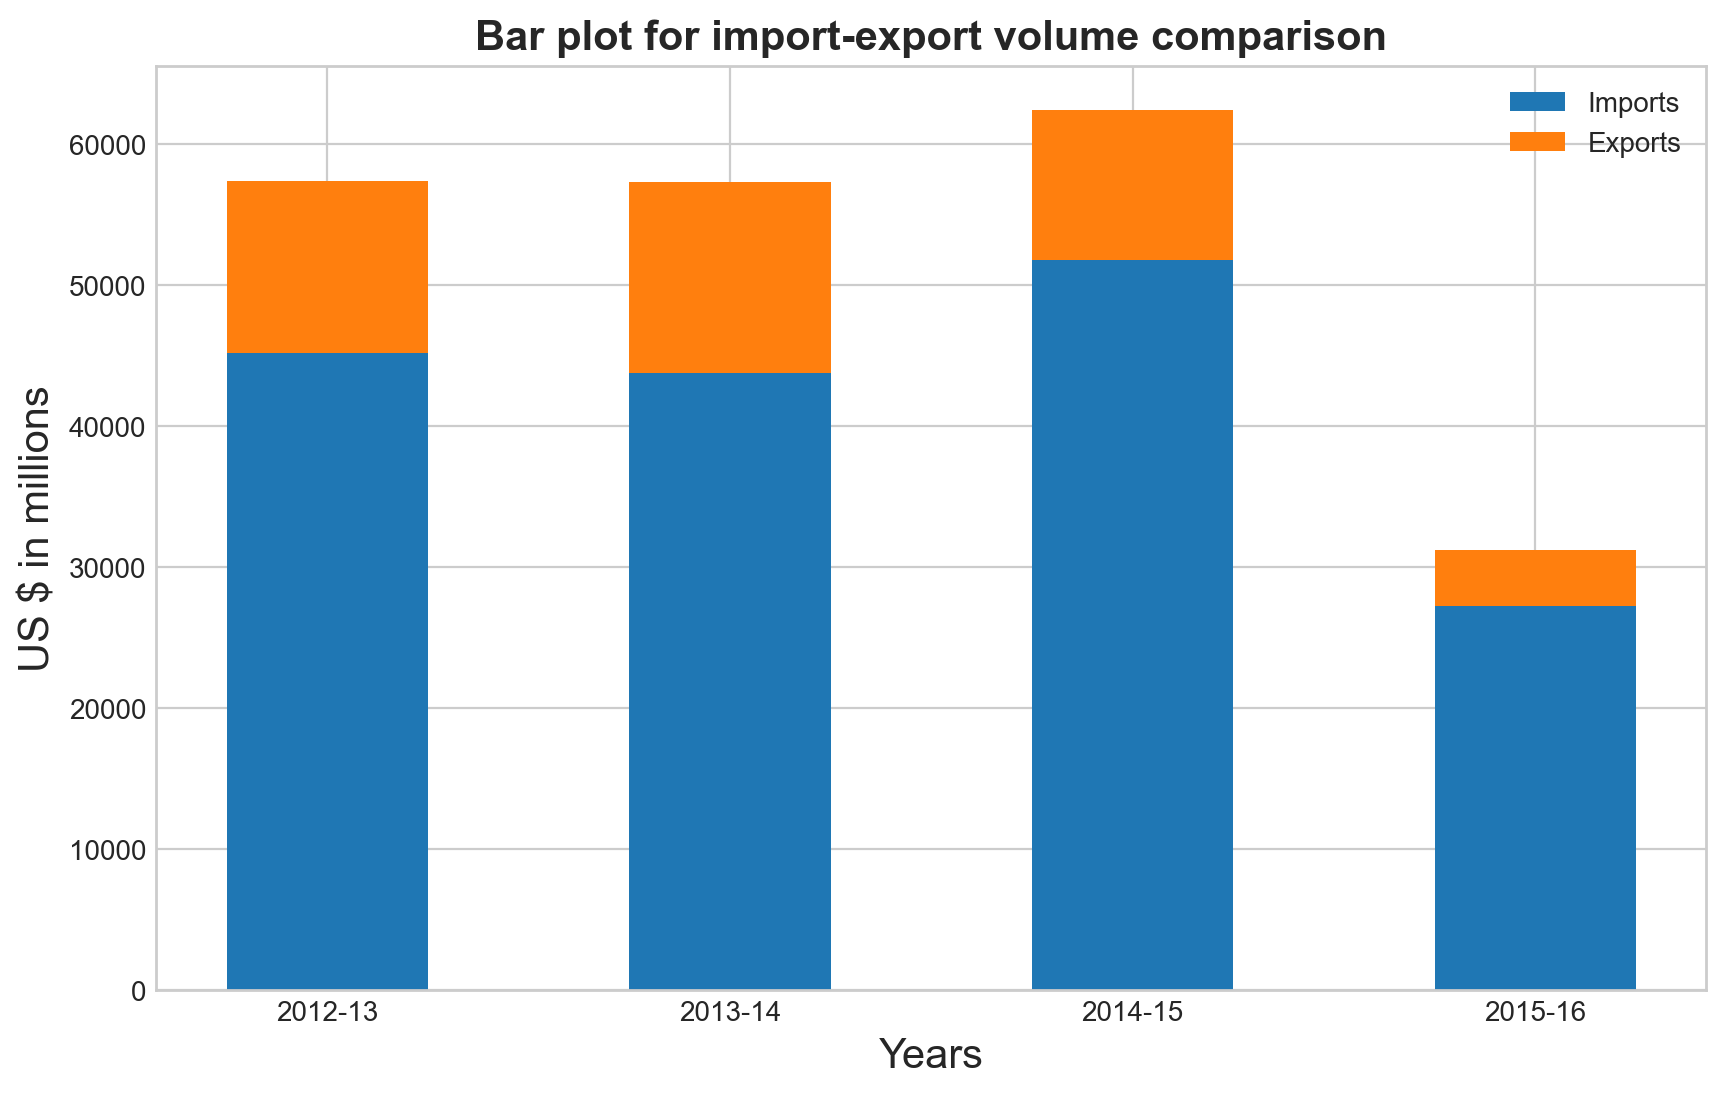

In [11]:
x = ['2012-13','2013-14','2014-15','2015-16']
fig = plt.subplots(figsize =(10, 6))
plt.style.use("seaborn-whitegrid")
width = 0.5
p1 = plt.bar(x, y1, width)
p2 = plt.bar(x, y2, width, bottom = y1)
plt.legend(('Imports', 'Exports'))
plt.title('Bar plot for import-export volume comparison', size = 15, fontweight="bold")
plt.ylabel('US $ in millions', size=15)
plt.xlabel('Years', size=15)

plt.savefig('bar_Imports_Exports.png')

plt.show()


<font size = 4, color=green><i><b>This bar graph comparison of total import-export volume shows import volume is way larger than export.</font>

## 4.3 Box plot comparison of subsequent years


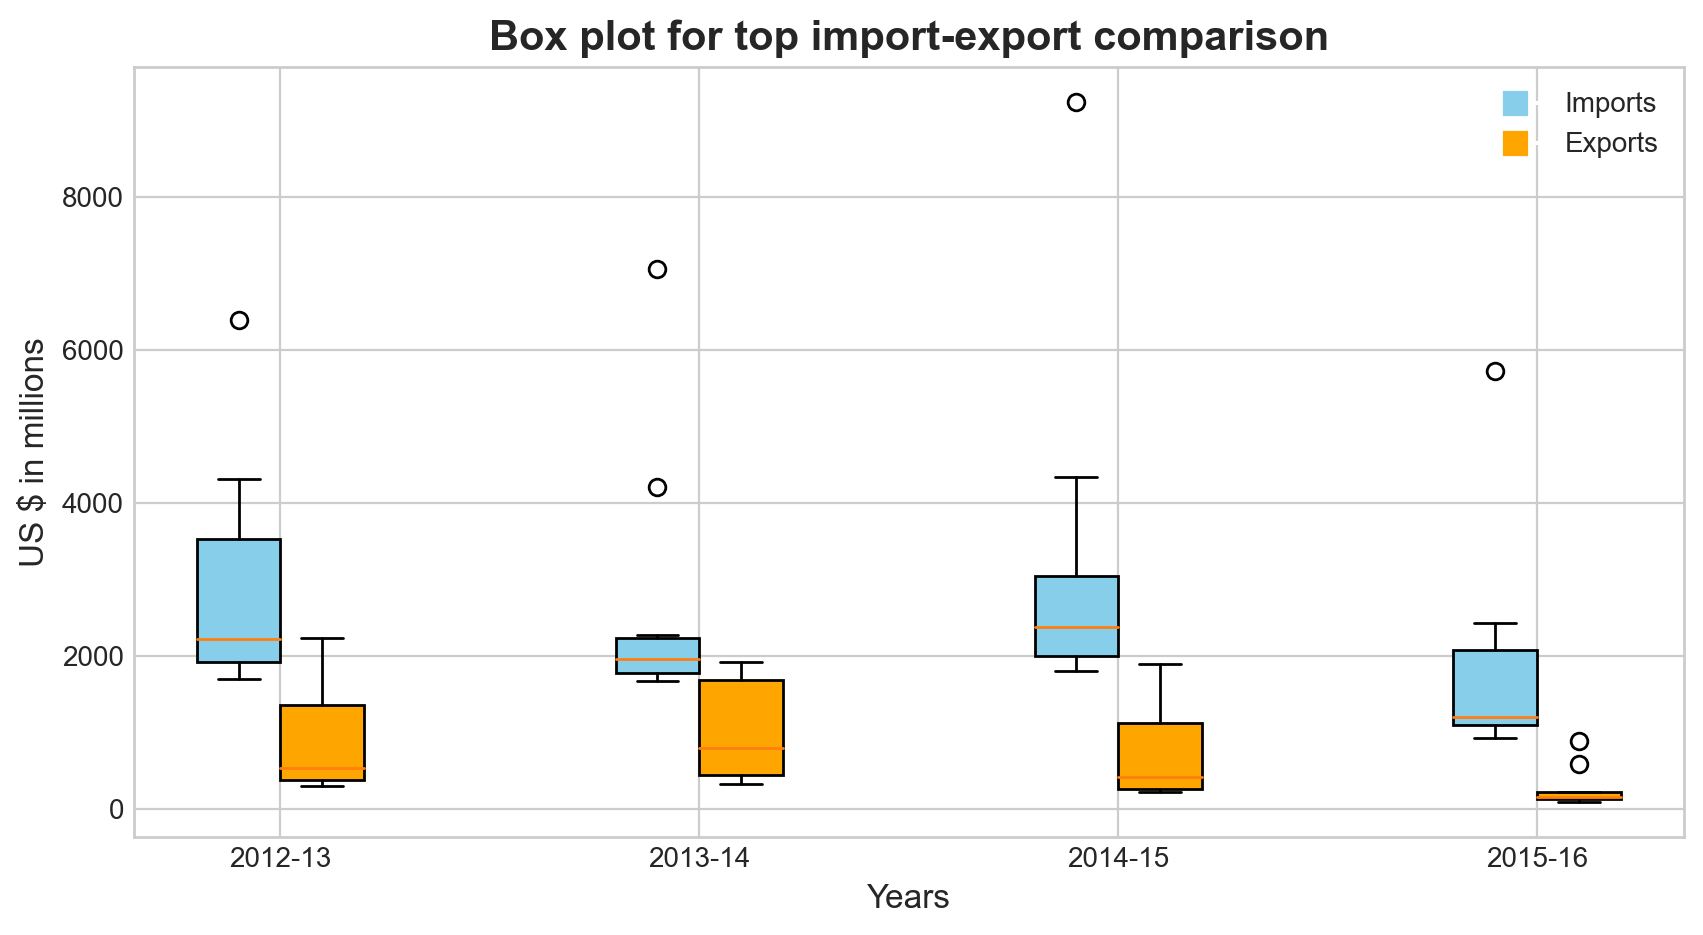

In [12]:
df_import = []
df_export = []

for i in range(1,5):
    df_topImports = list(df.sort_values(by=cols[2*i], ascending=False)[:10][cols[2*i]])
    df_topExports = list(df.sort_values(by=cols[2*i-1], ascending=False)[:10][cols[2*i-1]])

    df_import.append(df_topImports)
    df_export.append(df_topExports)

years = ['2012-13', '2013-14', '2014-15', '2015-16']  # Your x-axis labels

fig = plt.figure(figsize=(10, 5))
plt.title('Box plot for top import-export comparison', size=15, fontweight="bold")
plt.ylabel('US $ in millions', size=12)
plt.xlabel('Years', size=12)

positions = range(1, len(years)*2,2)

bpl = plt.boxplot(df_import, positions=[pos - 0.2 for pos in positions], widths=0.4, patch_artist=True)
bpr = plt.boxplot(df_export, positions=[pos + 0.2 for pos in positions], widths=0.4, patch_artist=True)

colors = ['skyblue', 'orange']
for box, color in zip([bpl, bpr], colors):
    for patch in box['boxes']:
        patch.set_facecolor(color)

legend_handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=color, markersize=10) for color in colors]
legend_labels = ['Imports', 'Exports']
plt.legend(legend_handles, legend_labels)

plt.xticks(positions,years)  # Set the x-axis labels to your specified year labels

plt.savefig('box_Imports_Exports.png')

plt.show()

<font size = 4, color=green><i><b>Every year mean and volume of import is greater than export. And import also have very high outliers. So, if India can control on those outliers imports then it will be good.</font>

##Pair plot comparison of subsequent years


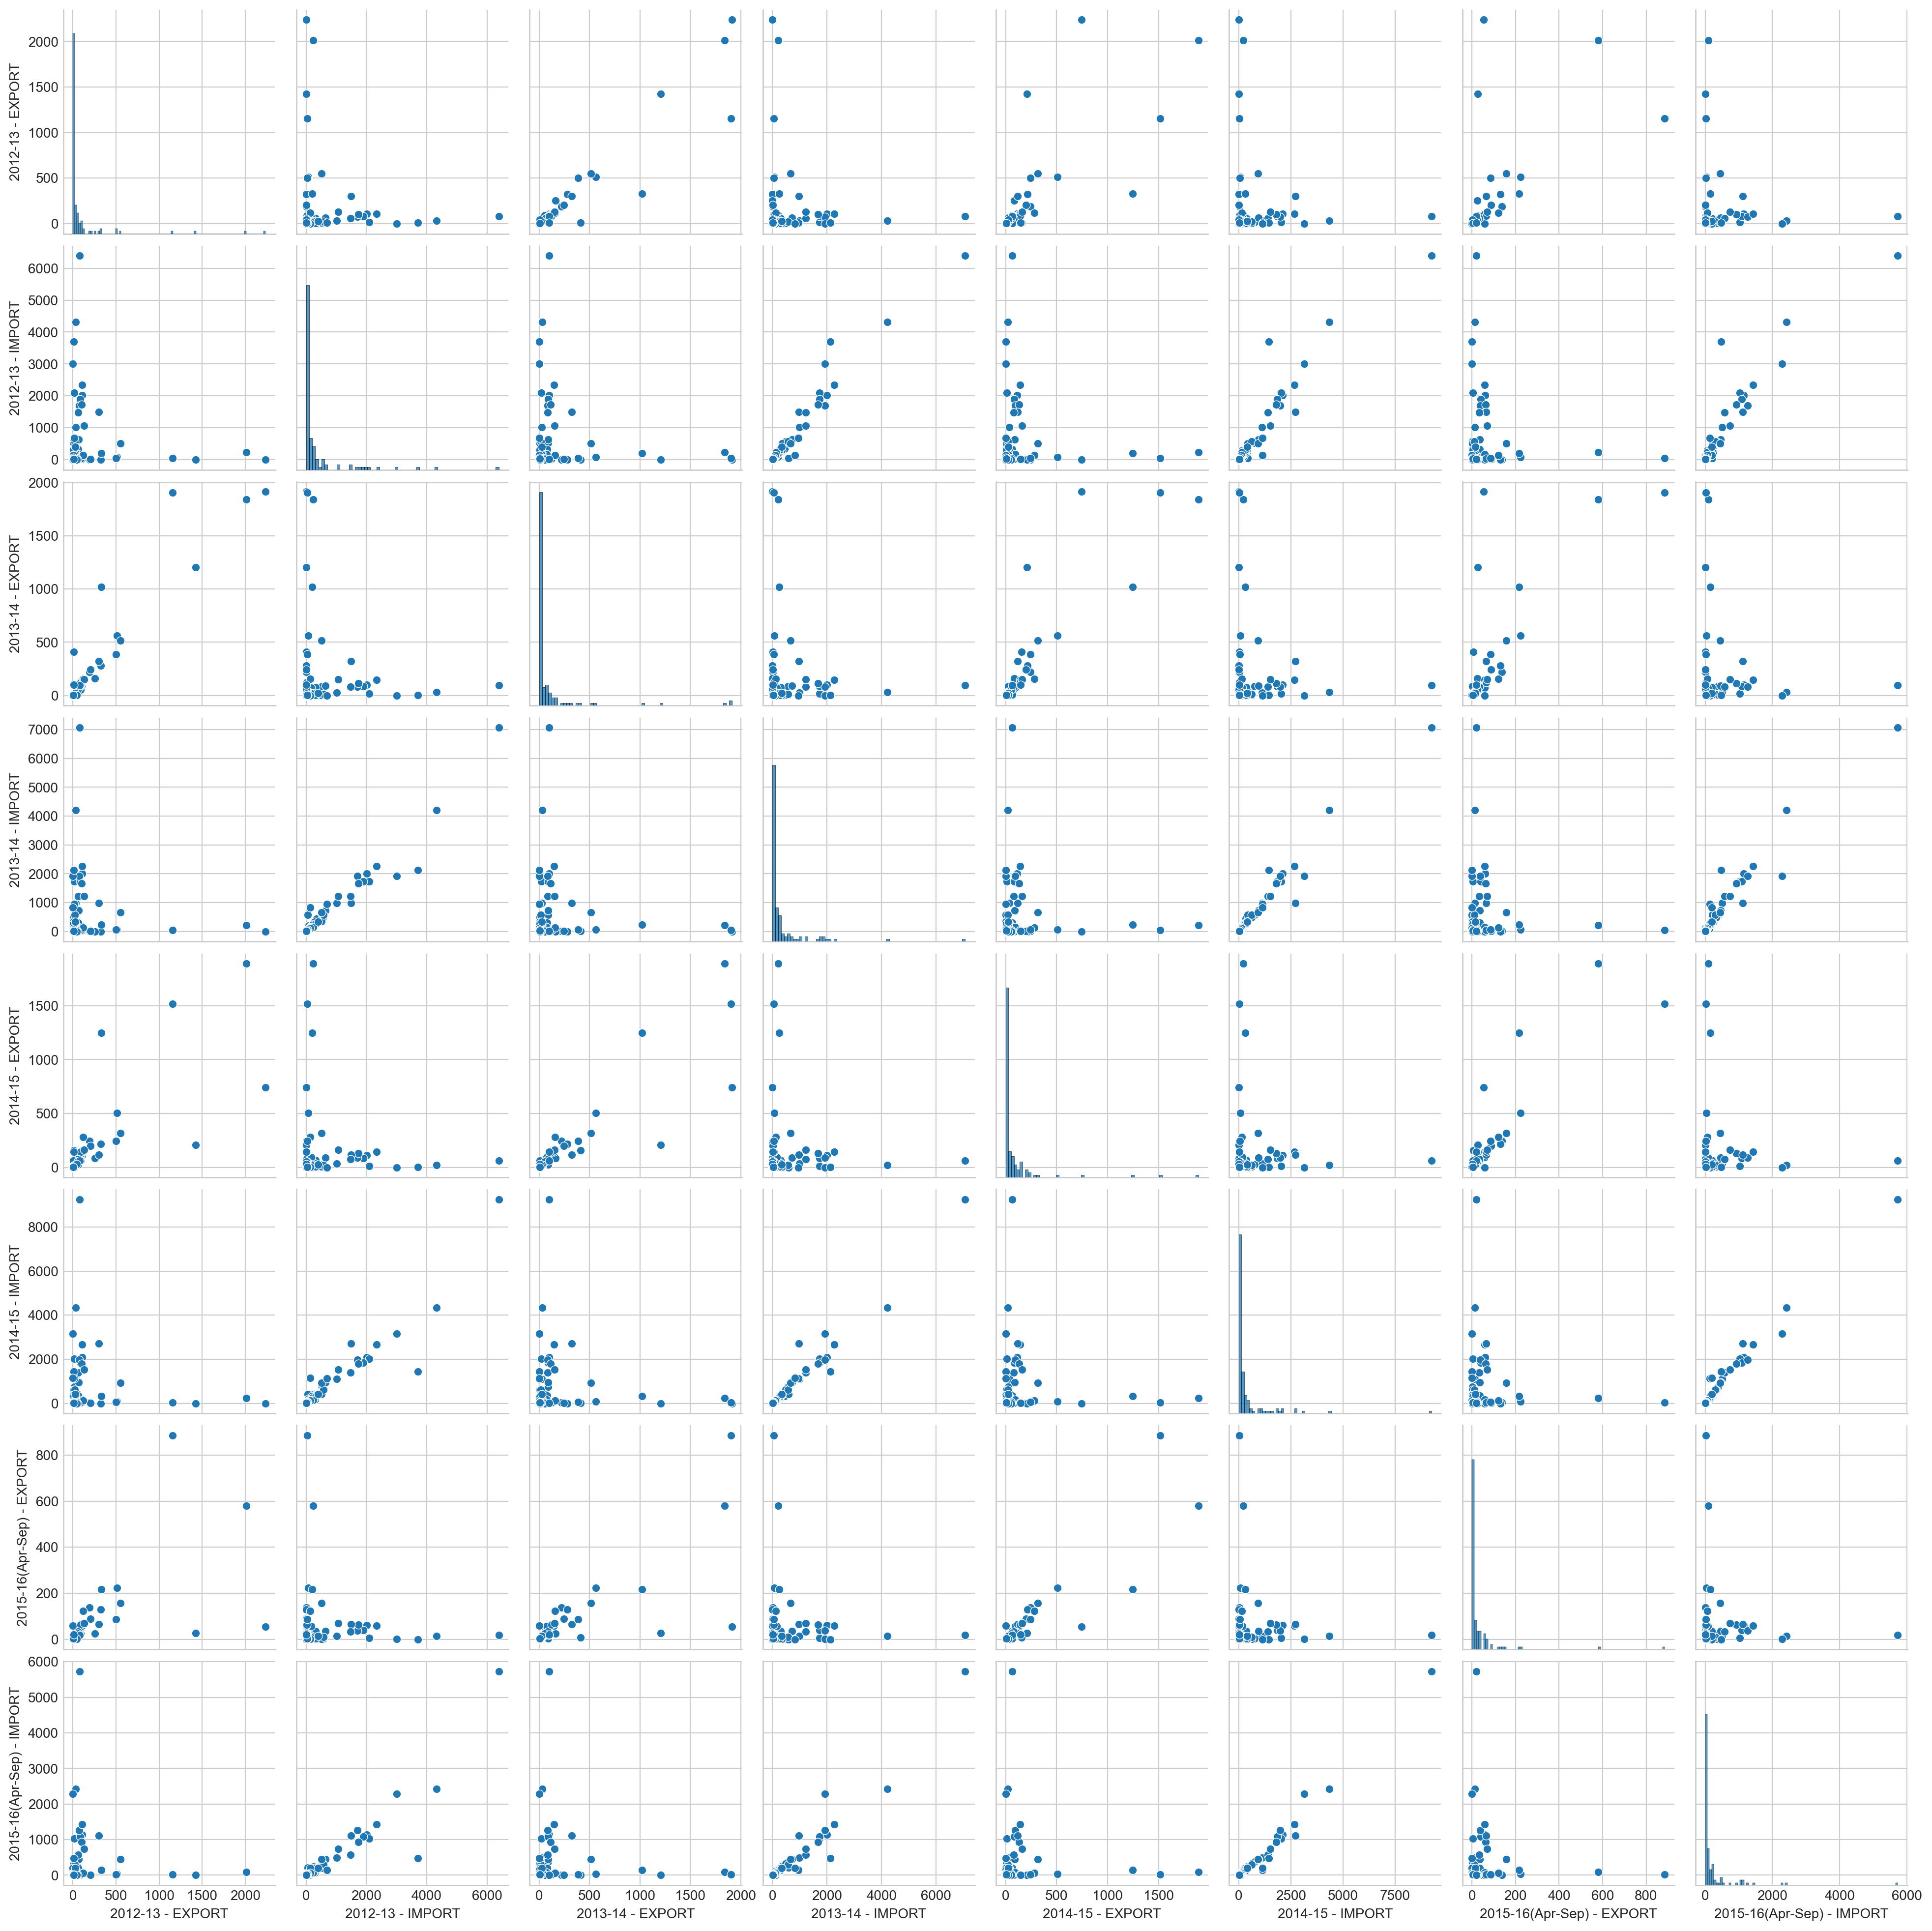

In [13]:
sns.pairplot(df)

plt.savefig('pairplot_Imports_Exports.png')

plt.show()

<font size = 4, color=green><i><b>Diagonal contains univarite distribution while off diagonals are multivariate distribution. We have already discussed each in detail earlier. However pair plot is a great tool to see all relation in a single frame.</font>